<a href="https://colab.research.google.com/github/mintra-tippayaratsontorn/DWDM21/blob/main/Chapter6_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/DWDM2021_DATA'

Mounted at /content/drive


In [3]:
data = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin1')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [4]:
data.sort_values(by=['InvoiceNo'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/09/2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/09/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/09/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/09/2011 11:58,1.25,17315.0,United Kingdom


In [5]:
data[data['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/01/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/01/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/01/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/09/2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/09/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/09/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/09/2011 11:58,1.25,17315.0,United Kingdom


In [6]:
data[data['InvoiceNo'].str.contains('536391')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/01/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/01/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/01/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/01/2010 10:24,1.65,17548.0,United Kingdom


In [7]:
data[data['CustomerID']==17548]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/01/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/01/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/01/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/01/2010 10:24,1.65,17548.0,United Kingdom
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,4/20/2011 12:01,1.25,17548.0,United Kingdom
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,4/20/2011 12:01,1.65,17548.0,United Kingdom
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,4/20/2011 12:01,1.65,17548.0,United Kingdom


### ลบ records ที่ถูก cancel ออกไป

In [8]:
data_clean = data[data['Quantity']>=1]
data_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


### [Q] มีประเทศสาขาของ supermaket นี้ทั้งหมดกี่ประเทศ

In [9]:
set(data['Country'])

{'Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'EIRE',
 'European Community',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'USA',
 'United Arab Emirates',
 'United Kingdom',
 'Unspecified'}

In [10]:
# นับว่ามีทั้งหมดกี่ประเทศ
len(set(data['Country']))

38

### [HW13] วาดกราฟสรุปจำนวน item และยอดขายของแต่ละประเทศ

In [11]:
from matplotlib import pyplot as plt

In [12]:
import numpy as np

In [13]:
Quantity_1 = data['Quantity']
Quantity_1

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 541909, dtype: int64

In [14]:
Quantity_sum = sum(Quantity_1)  #sum ค่า Quantity
Quantity_sum

5176450

In [15]:
sales = Quantity_1*data['UnitPrice']  #ยอดขายของแต่ละประเทศ
sales

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Length: 541909, dtype: float64

In [16]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
sales = [15.30,20.34,22.00,20.34,20.34]
Country = [0,1,2,3,4]

<BarContainer object of 5 artists>

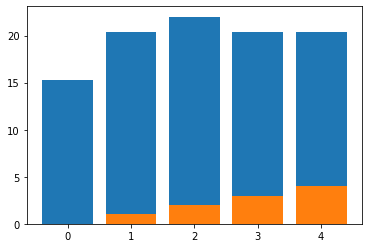

In [17]:
plt.bar([0,1,2,3,4],sales)
plt.bar([0,1,2,3,4],Country)

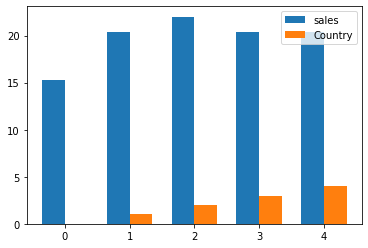

In [18]:
width =0.35
plt.bar(np.array([0,1,2,3,4]) - width/2, sales, width=width, label = 'sales')  #เปลี่ยน list เป็น string
plt.bar(np.array([0,1,2,3,4]) + width/2, Country, width=width, label = 'Country')
plt.legend()

### เฉลย HW13

เพิ่ม column ราคารวม

In [19]:
data_clean['total']=data_clean['Quantity']*data_clean['UnitPrice']
data_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,16.60


In [20]:
data_clean.groupby(['Country']).sum()

,Quantity,UnitPrice,CustomerID,total
Country,,,,
Australia,84209,3.612500e+03,1.475853e+07,1.385213e+05
Austria,4881,1.693900e+03,4.982601e+06,1.019868e+04
Bahrain,314,8.276000e+01,2.100270e+05,7.541400e+02
Belgium,23237,7.372850e+03,2.524670e+07,4.119634e+04
Brazil,356,1.426000e+02,4.086080e+05,1.143600e+03
Canada,2763,9.105800e+02,2.615483e+06,3.666380e+03
Channel Islands,9491,3.389650e+03,1.113834e+07,2.045044e+04
Cyprus,6361,3.506180e+03,7.616904e+06,1.359038e+04
Czech Republic,671,7.827000e+01,3.195250e+05,8.267400e+02


In [21]:
data_clean[data_clean['InvoiceNo'].str.contains('A')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
299982,A563185,B,Adjust bad debt,1,08/12/2011 14:50,11062.06,NaN,United Kingdom,11062.06
299983,A563186,B,Adjust bad debt,1,08/12/2011 14:51,-11062.06,NaN,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,08/12/2011 14:52,-11062.06,NaN,United Kingdom,-11062.06


## เตรียม Data สำหรับ (Fequence Pattern) Association Rule

In [22]:
data_clean.groupby('InvoiceNo')['StockCode'].apply(list)

InvoiceNo
536365     [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
536366                                        [22633, 22632]
536367     [84879, 22745, 22748, 22749, 22310, 84969, 226...
536368                          [22960, 22913, 22912, 22914]
536369                                               [21756]
                                 ...                        
581586                          [22061, 23275, 21217, 20685]
581587     [22631, 22556, 22555, 22728, 22727, 22726, 227...
A563185                                                  [B]
A563186                                                  [B]
A563187                                                  [B]
Name: StockCode, Length: 20728, dtype: object

In [23]:
transactions = data_clean.groupby('InvoiceNo')['StockCode'].apply(list)

## Apriori

http://zaxrosenberg.com/unofficial-apyori-documentation/

In [24]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=b3e01e17fe22852f67cfd22d0952aba19623d8211e0b64fea87e7c7db824961c
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [25]:
from apyori import apriori

In [26]:
frequentItemsets = list(apriori(transactions,min_support=0.1))  # อย่างน้อย 10 % ของ record ทั้งหมด
frequentItemsets

[RelationRecord(items=frozenset({'85099B'}), support=0.10092628328830568, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85099B'}), confidence=0.10092628328830568, lift=1.0)]),
 RelationRecord(items=frozenset({'85123A'}), support=0.10628135854882285, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85123A'}), confidence=0.10628135854882285, lift=1.0)])]

In [27]:
frequentItemsets = list(apriori(transactions,min_support = 0.035))  # อย่างน้อย 5 % ของ record ทั้งหมด
frequentItemsets

[RelationRecord(items=frozenset({'20712'}), support=0.041634504052489384, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20712'}), confidence=0.041634504052489384, lift=1.0)]),
 RelationRecord(items=frozenset({'20719'}), support=0.040283674257043614, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20719'}), confidence=0.040283674257043614, lift=1.0)]),
 RelationRecord(items=frozenset({'20724'}), support=0.04988421458896179, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20724'}), confidence=0.04988421458896179, lift=1.0)]),
 RelationRecord(items=frozenset({'20725'}), support=0.07550173678116558, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20725'}), confidence=0.07550173678116558, lift=1.0)]),
 RelationRecord(items=frozenset({'20726'}), support=0.04911231184870706, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozense

In [28]:
frequentItemsets[-1]  # ดึงเอาแค่ตัวสุดท้ายมาลองทำ

RelationRecord(items=frozenset({'22699', '22697'}), support=0.037051331532226936, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.037051331532226936, lift=1.0), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7566502463054187, lift=14.71280141221268), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7204502814258911, lift=14.71280141221268)])

In [29]:
data_clean[data_clean['StockCode']=='22697']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
1086,536524,22697,GREEN REGENCY TEACUP AND SAUCER,6,12/01/2010 12:51,2.95,17572.0,United Kingdom,17.70
1644,536544,22697,GREEN REGENCY TEACUP AND SAUCER,6,12/01/2010 14:32,5.91,NaN,United Kingdom,35.46
2793,536592,22697,GREEN REGENCY TEACUP AND SAUCER,3,12/01/2010 17:06,5.91,NaN,United Kingdom,17.73
3357,536623,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/02/2010 10:39,2.95,15601.0,United Kingdom,35.40
3422,536627,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/02/2010 10:53,2.95,15658.0,United Kingdom,35.40
...,...,...,...,...,...,...,...,...,...
539148,581433,22697,GREEN REGENCY TEACUP AND SAUCER,6,12/08/2011 15:54,2.95,14911.0,EIRE,17.70
540215,581472,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/08/2011 19:55,2.95,15796.0,United Kingdom,35.40
540985,581492,22697,GREEN REGENCY TEACUP AND SAUCER,1,12/09/2011 10:03,5.79,NaN,United Kingdom,5.79
541220,581495,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/09/2011 10:20,2.95,14051.0,United Kingdom,35.40


In [30]:
data_clean[data_clean['StockCode']=='22699']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
1077,536523,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/01/2010 12:50,2.95,12868.0,United Kingdom,17.70
1193,536530,22699,ROSES REGENCY TEACUP AND SAUCER,4,12/01/2010 13:21,2.95,17905.0,United Kingdom,11.80
1645,536544,22699,ROSES REGENCY TEACUP AND SAUCER,2,12/01/2010 14:32,5.91,NaN,United Kingdom,11.82
2794,536592,22699,ROSES REGENCY TEACUP AND SAUCER,4,12/01/2010 17:06,5.91,NaN,United Kingdom,23.64
3397,536624,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/02/2010 10:45,2.95,13418.0,United Kingdom,17.70
...,...,...,...,...,...,...,...,...,...
539671,581439,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/08/2011 16:30,5.79,NaN,United Kingdom,34.74
540213,581472,22699,ROSES REGENCY TEACUP AND SAUCER,12,12/08/2011 19:55,2.95,15796.0,United Kingdom,35.40
540986,581492,22699,ROSES REGENCY TEACUP AND SAUCER,2,12/09/2011 10:03,5.79,NaN,United Kingdom,11.58
541218,581495,22699,ROSES REGENCY TEACUP AND SAUCER,12,12/09/2011 10:20,2.95,14051.0,United Kingdom,35.40


### (Quiz7) หา k-itemset ที่มีความน่าสนใจ (โดยพิจารณาลูกค้าเป็นรายคน) พร้อมทั้งอธิบายว่าน่าสนใจยังไง ส่งก่อน 11.25

In [31]:
transactions2 = data_clean.groupby('CustomerID')['StockCode'].apply(list)
transactions2

CustomerID
12346.0                                              [23166]
12347.0    [85116, 22375, 71477, 22492, 22771, 22772, 227...
12348.0    [84992, 22951, 84991, 84991, 21213, 21213, 226...
12349.0    [23112, 23460, 21564, 21411, 21563, 22131, 221...
12350.0    [21908, 22412, 79066K, 79191C, 22348, 84086C, ...
                                 ...                        
18280.0    [82484, 22180, 22467, 22725, 22727, 22495, 223...
18281.0    [22037, 22716, 22028, 23007, 23008, 23209, 22467]
18282.0    [21270, 23187, 23295, 22089, 21108, 21109, 224...
18283.0    [22356, 20726, 22384, 22386, 20717, 20718, 850...
18287.0    [22755, 22754, 22753, 22756, 22758, 22757, 227...
Name: StockCode, Length: 4339, dtype: object

In [32]:
frequenceItemset = list(apriori(transactions2,min_support = 0.1)) # อย่างน้อย 10 % ของ record ทั้งหมด
frequenceItemset

[RelationRecord(items=frozenset({'20725'}), support=0.12260889605899977, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20725'}), confidence=0.12260889605899977, lift=1.0)]),
 RelationRecord(items=frozenset({'20727'}), support=0.10555427517861259, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20727'}), confidence=0.10555427517861259, lift=1.0)]),
 RelationRecord(items=frozenset({'20728'}), support=0.11039410002304678, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20728'}), confidence=0.11039410002304678, lift=1.0)]),
 RelationRecord(items=frozenset({'21034'}), support=0.11062456787278174, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'21034'}), confidence=0.11062456787278174, lift=1.0)]),
 RelationRecord(items=frozenset({'21212'}), support=0.14634708458170084, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'